# ICMA395 Project: Finding Magic Squares Using Heuristic Methods

In [5]:
import numpy as np
import scipy as sp
import pandas as pd
import random
import copy
import math
import seaborn as sns
import matplotlib.pyplot as plt
from collections import deque

### 2-step process:

1. Find a semi magic square
2. Make moves that preserve row and column sums to find a full magic square

### Perturbation methods:

1. Swap random entries ('Naive')
2. Swap two neighboring entries 

## Setup

In [86]:
def make_matrix(sol, order):
    ans = [[] for _ in range(order)]
    j = 0
    for i in range(len(sol)):
        ans[j].append(sol[i])
        if (i+1)%order == 0:
            j+=1
    return ans

def random_sol(order):
    lst = [i+1 for i in range(order**2)]
    random.shuffle(lst)
    return lst

def matrix_to_sol(matrix):
    sol = []
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            sol.append(matrix[i][j])
    return sol

def cost1(sol, n):
    S = int(n*(n**2 + 1)/2)
    column_sums = np.sum(sol, axis=0)
    row_sums = np.sum(sol, axis=1)
    # diagonal_sums = np.array([np.trace(sol), np.trace(np.fliplr(sol))])
    return np.sum(abs(S - column_sums)) + np.sum(abs(S-row_sums))

def cost2(sol, n):
    S = int(n*(n**2 + 1)/2)
    return abs(S - np.trace(sol)) + abs(S - np.trace(np.fliplr(sol)))

def cost(sol, n):
    return cost1(sol, n) + cost2(sol, n)

def adj_swap(sol, order):
    new_sol = copy.deepcopy(sol)
    i1 = random.randint(0, order-1)
    j1 = random.randint(0, order-1)
    temp = new_sol[i1][j1]
    neighbors = ['left','right','above','below']
    if i1 == 0:
        neighbors.remove('above')
    if i1 == order-1:
        neighbors.remove('below')
    if j1 == 0:
        neighbors.remove('left')
    if j1 == order-1:
        neighbors.remove('right')
    choice = random.choice(neighbors)
    if choice == 'left':
        new_sol[i1][j1] = new_sol[i1][j1-1]
        new_sol[i1][j1-1] = temp
    elif choice == 'right':
        new_sol[i1][j1] = new_sol[i1][j1+1]
        new_sol[i1][j1+1] = temp
    elif choice == 'above':
        new_sol[i1][j1] = new_sol[i1-1][j1]
        new_sol[i1-1][j1] = temp
    elif choice == 'below':
        new_sol[i1][j1] = new_sol[i1+1][j1]
        new_sol[i1+1][j1] = temp
    return new_sol

In [16]:
cost2(make_matrix([24, 22, 13, 5, 1, 12, 25, 6, 19, 3, 14, 2, 21, 8, 20, 11, 9, 10, 17, 18, 4, 7, 15, 16, 23], 5), 5)

56

In [10]:
make_matrix([24, 22, 13, 5, 1, 12, 25, 6, 19, 3, 14, 2, 21, 8, 20, 11, 9, 10, 17, 18, 4, 7, 15, 16, 23], 5)

[[24, 22, 13, 5, 1],
 [12, 25, 6, 19, 3],
 [14, 2, 21, 8, 20],
 [11, 9, 10, 17, 18],
 [4, 7, 15, 16, 23]]

In [3]:
def gen_starting_states(order, n_trials):
    return [random_sol(order) for _ in range(n_trials)]

## Local Search

In [59]:
def naive_local_search(n_trials, n_iterations, orders):
    data = []
    for order in orders:
        starting_sols = gen_starting_states(order, n_trials)
        for trial in range(n_trials):
            current_sol = starting_sols[trial]
            current_cost = cost(make_matrix(current_sol, order), order)
            for i in range(n_iterations):
                idx1 = random.randint(0, order**2-1)
                idx2 = random.randrange(0, order**2-1)
                new_sol = current_sol.copy()
                temp = new_sol[idx1]
                new_sol[idx1] = new_sol[idx2]
                new_sol[idx2] = temp
                new_cost = cost(make_matrix(new_sol, order), order)
                if new_cost < current_cost:
                    current_cost = new_cost
                    current_sol = new_sol
                data.append((trial+1, i+1, order, 'Local Search', 'Random Swap', current_cost))
                if current_cost == 0:
                    print(order)
                    print(current_sol)
                    break
    return data

def local_search(n_trials, n_iterations, orders):
    data = []
    for order in orders:
        starting_sols = gen_starting_states(order, n_trials)
        for trial in range(n_trials):
            current_sol = make_matrix(starting_sols[trial], order)
            current_cost = cost(current_sol, order)
            for i in range(n_iterations):
                new_sol = adj_swap(current_sol, order)
                new_cost = cost(new_sol, order)
                if new_cost < current_cost:
                    current_cost = new_cost
                    current_sol = new_sol
                data.append((trial+1, i+1, order, 'Local Search', 'Adjacent Swap', current_cost))
    return data


# randswapls = naive_local_search(100, 10000, [3, 4, 5, 6])
# adjswapls = local_search(100, 10000, [3, 4, 5, 6])

In [84]:
def check_diags(sol, order):
    return cost2(make_matrix(sol, order), order)

s = [59, 60, 28, 40, 26, 33, 10, 4, 9, 62, 29, 49, 1, 50, 19, 41, 32, 21, 38, 16, 13, 54, 34, 52, 37, 42, 18, 8, 57, 22, 64, 12, 43, 7, 58, 2, 47, 3, 56, 44, 31, 27, 61, 51, 45, 15, 6, 24, 35, 36, 11, 55, 48, 30, 25, 20, 14, 5, 17, 39, 23, 53, 46, 63]

check_diags(s, 8)

70

In [90]:
ls_df = pd.read_csv('localsearch.csv')

In [91]:
ls3 = ls_df[ls_df['Order'] == 3]
ls4 = ls_df[ls_df['Order'] == 4]
ls5 = ls_df[ls_df['Order'] == 5]
ls6 = ls_df[ls_df['Order'] == 6]

In [108]:
len(ls6[ls6['Cost'] == 0]['Trial'].unique())

1

Text(0.5, 1.0, '$n=3$ Local Search')

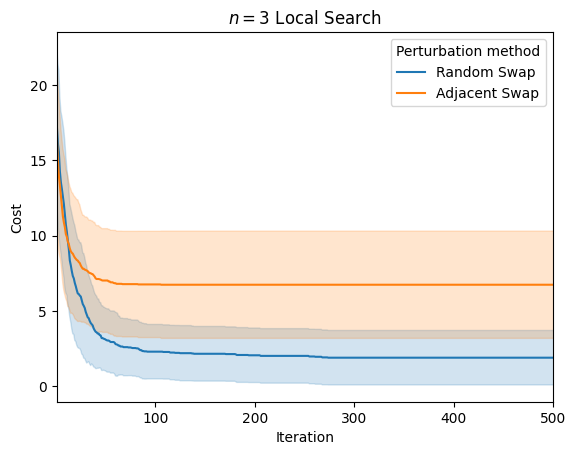

In [93]:
sns.lineplot(ls3, x="Iteration", y="Cost", hue="Perturbation method", errorbar='sd')
plt.xlim(1, 500)
plt.title(r'$n=3$ Local Search')

Text(0.5, 1.0, '$n=4$ Local Search')

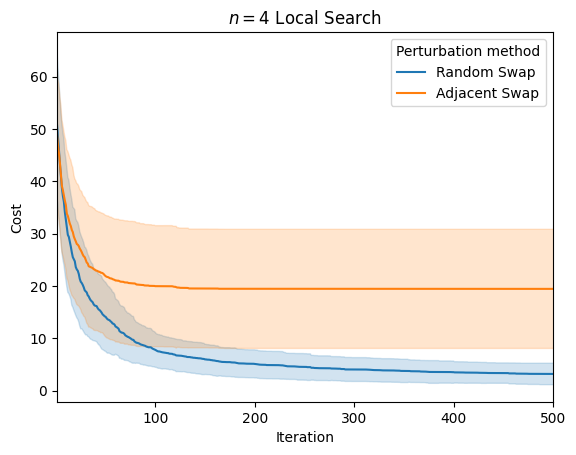

In [104]:
sns.lineplot(ls4, x="Iteration", y="Cost", hue="Perturbation method", errorbar='sd')
plt.xlim(1, 500)
plt.title(r'$n=4$ Local Search')

Text(0.5, 1.0, '$n=5$ Local Search')

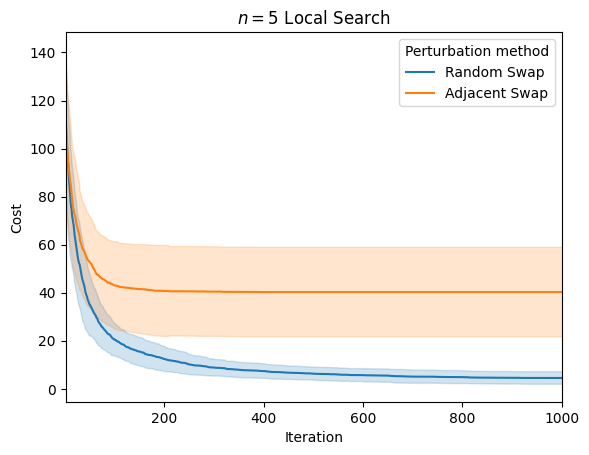

In [102]:
sns.lineplot(ls5, x="Iteration", y="Cost", hue="Perturbation method", errorbar='sd')
plt.xlim(1, 1000)
plt.title(r'$n=5$ Local Search')

Text(0.5, 1.0, '$n=6$ Local Search')

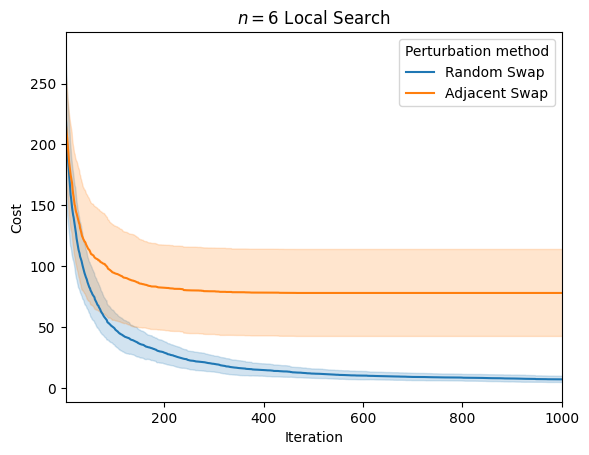

In [105]:
sns.lineplot(ls6, x="Iteration", y="Cost", hue="Perturbation method", errorbar='sd')
plt.xlim(1, 1000)
plt.title(r'$n=6$ Local Search')

## Simulated Annealing

In [147]:
def naive_sa(n_trials, alpha, n_iterations, orders):
    data = []
    for order in orders:
        starting_sols = gen_starting_states(order, n_trials)
        for trial in range(n_trials):
            current_sol = starting_sols[trial]
            current_cost = cost(make_matrix(current_sol, order), order)
            if order == 3:
                T0 = 100
            elif order == 4:
                T0 = random.randint(100, 1000)
            else: T0 = 1000
            t = T0
            i = 0
            accepted = 0
            total = 0
            while t > 0 and i < n_iterations:
                idx1 = random.randint(0, order**2-1)
                idx2 = random.randrange(0, order**2-1)
                new_sol = current_sol.copy()
                temp = new_sol[idx1]
                new_sol[idx1] = new_sol[idx2]
                new_sol[idx2] = temp
                new_cost = cost(make_matrix(current_sol, order), order)
                dy = new_cost - current_cost
                if dy < 0:
                    current_sol = new_sol
                    current_cost = new_cost
                else:
                    total += 1
                    if random.uniform(0, 1) < np.exp(-dy/t):
                        accepted += 1
                        current_sol = new_sol
                        current_cost = new_cost
                # if total == 0:
                #     data.append((T0, order, trial+1, i+1, 1))
                # else:
                #     data.append((T0, order, trial+1, i+1, accepted/total))
                t = alpha*t
                i += 1
                data.append((trial + 1, i+1, order, 'Simulated Annealing', 'Random Swap', current_cost))
    return data

def sa(n_trials, alpha, n_iterations, orders):
    data = []
    for order in orders:
        starting_sols = gen_starting_states(order, n_trials)
        for trial in range(n_trials):
            current_sol = make_matrix(starting_sols[trial], order)
            current_cost = cost(current_sol, order)
            if order == 3:
                T0 = 100
            elif order == 4:
                T0 = random.randint(100, 1000)
            else: T0 = 1000
            t = T0
            i = 0
            while t > 0 and i < n_iterations:
                new_sol = adj_swap(current_sol, order)
                new_cost = cost(new_sol, order)
                dy = new_cost - current_cost
                if dy < 0:
                    current_sol = new_sol
                else:
                    if random.uniform(0, 1) < np.exp(-dy/t):
                        current_sol = new_sol
                t = alpha*t
                i += 1
                data.append((trial + 1, i+1, order, 'Simulated Annealing', 'Adjacent Swap', current_cost))
    return data

randswapsa = naive_sa(100, 0.95, 10000, [3,4,5,6])
adjswapsa = sa(100, 0.95, 10000, [3,4,5,6])

In [148]:
df1 = pd.DataFrame(randswapsa, columns=["Trial", "Iteration", "Order", "Algorithm", "Perturbation method", "Cost"])
df2 = pd.DataFrame(adjswapsa, columns=["Trial", "Iteration", "Order", "Algorithm", "Perturbation method", "Cost"])

In [49]:
sadf = pd.read_csv('sa.csv')

In [55]:
order3sa = sadf[(sadf['Order']==3)]
order4sa = sadf[(sadf['Order']==4)]
order5sa = sadf[(sadf['Order']==5)]
order6sa = sadf[(sadf['Order']==6)]

Text(0.5, 1.0, '$n=3$ SA')

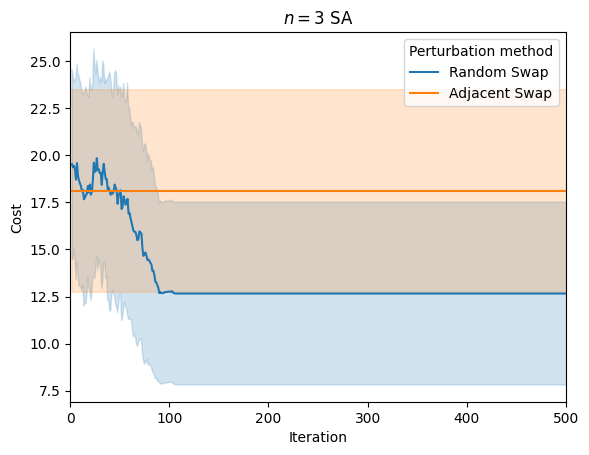

In [54]:
sns.lineplot(order3sa, x="Iteration", y="Cost", hue="Perturbation method", errorbar='sd')
plt.xlim(0, 500)
plt.title(r'$n=3$ SA')

Text(0.5, 1.0, '$n=4$ SA')

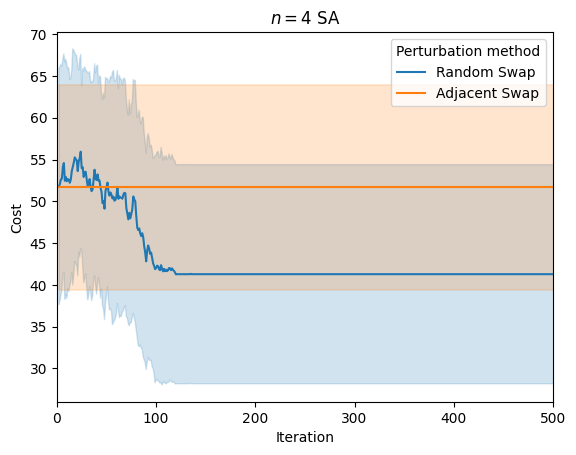

In [56]:
sns.lineplot(order4sa, x="Iteration", y="Cost", hue="Perturbation method", errorbar='sd')
plt.xlim(0, 500)
plt.title(r'$n=4$ SA')

Text(0.5, 1.0, '$n=5$ SA')

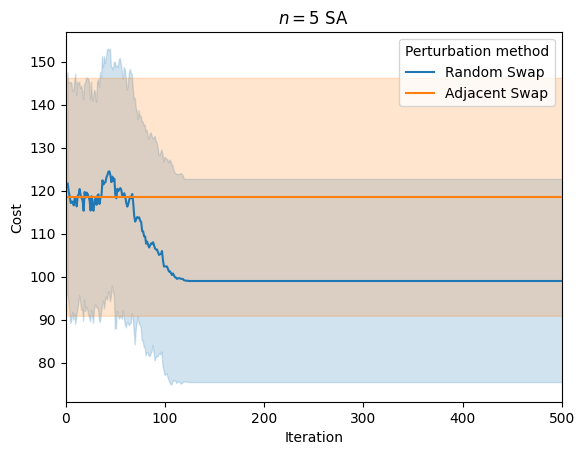

In [57]:
sns.lineplot(order5sa, x="Iteration", y="Cost", hue="Perturbation method", errorbar='sd')
plt.xlim(0, 500)
plt.title(r'$n=5$ SA')

Text(0.5, 1.0, '$n=6$ SA')

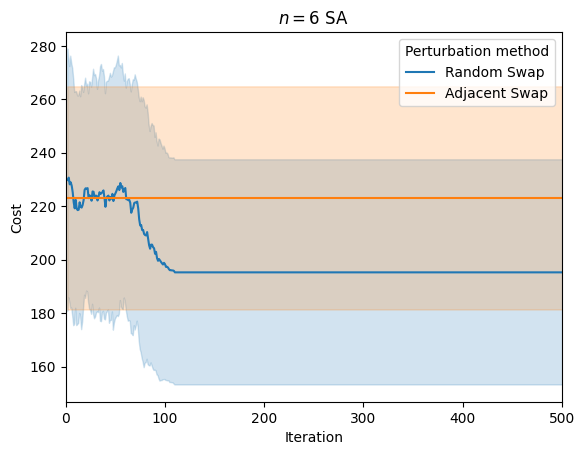

In [58]:
sns.lineplot(order6sa, x="Iteration", y="Cost", hue="Perturbation method", errorbar='sd')
plt.xlim(0, 500)
plt.title(r'$n=6$ SA')

### Finding $T_0$

In [120]:
acceptance_df = pd.read_csv('acceptance.csv')

In [121]:
acc3 = acceptance_df[acceptance_df['Order'] == 3]
acc4 = acceptance_df[acceptance_df['Order'] == 4]
acc5 = acceptance_df[acceptance_df['Order'] == 5]
acc6 = acceptance_df[acceptance_df['Order'] == 6]

Text(0.5, 1.0, '$n=3$')

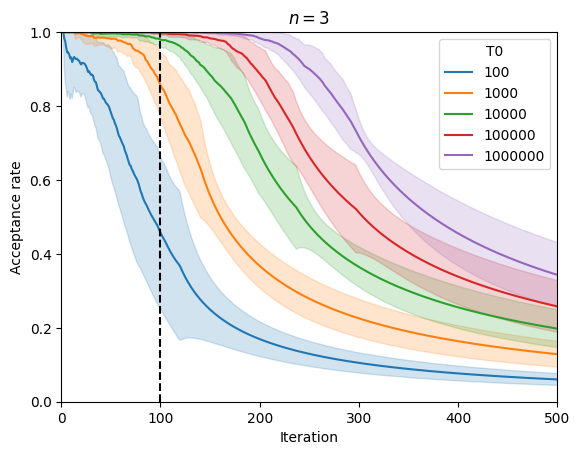

In [140]:
sns.lineplot(acc3, x="Iteration", y="Acceptance rate", hue="T0", errorbar='sd', palette='tab10')
plt.xlim(0, 500)
plt.ylim(0, 1)
plt.axvline(100, linestyle = '--', color='black')
plt.title(r'$n=3$')

Text(0.5, 1.0, '$n=4$')

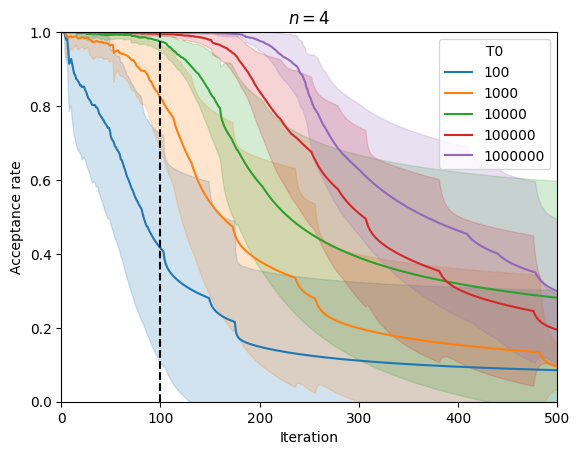

In [138]:
sns.lineplot(acc4, x="Iteration", y="Acceptance rate", hue="T0", errorbar='sd', palette='tab10')
plt.xlim(0, 500)
plt.ylim(0, 1)
plt.axvline(100, linestyle = '--', color='black')
plt.title(r'$n=4$')

Text(0.5, 1.0, '$n=5$')

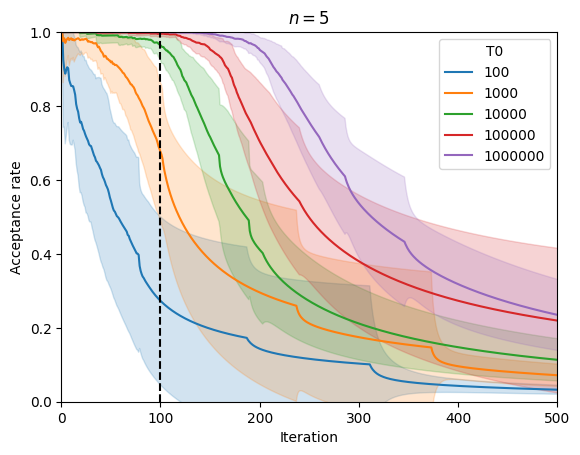

In [137]:
sns.lineplot(acc5, x="Iteration", y="Acceptance rate", hue="T0", errorbar='sd', palette='tab10')
plt.xlim(0, 500)
plt.ylim(0, 1)
plt.axvline(100, linestyle = '--', color='black')
plt.title(r'$n=5$')

Text(0.5, 1.0, '$n=6$')

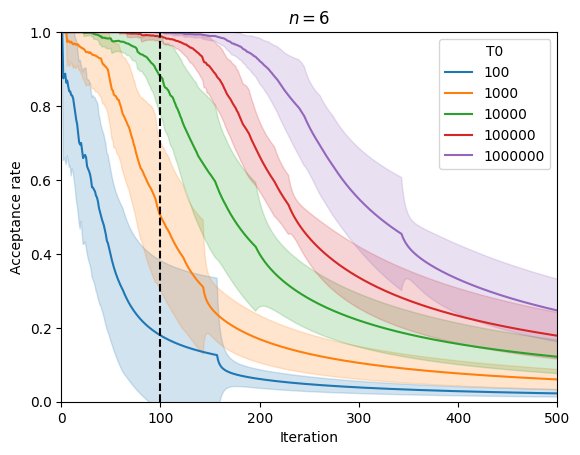

In [139]:
sns.lineplot(acc6, x="Iteration", y="Acceptance rate", hue="T0", errorbar='sd', palette='tab10')
plt.xlim(0, 500)
plt.ylim(0, 1)
plt.axvline(100, linestyle = '--', color='black')
plt.title(r'$n=6$')

## Tabu Search

In [15]:
def naive_tabu(n_trials, ks, Vs, n_iterations, orders):
    data = []
    for order in orders:
        print(order)
        starting_sols = gen_starting_states(order, n_trials)
        for V in Vs:
            for k in ks:
                for trial in range(n_trials):
                    current_sol = starting_sols[trial]
                    tabu_list = deque()
                    freq = dict()
                    global_best = float('inf')
                    global_best_sol = current_sol
                    for i in range(n_iterations):
                        neighbors = []
                        for j in range(V):
                            idx1 = random.randint(0, order**2-1)
                            idx2 = random.randrange(0, order**2-1)
                            while idx1 == idx2:
                                idx2 = random.randrange(0, order**2-1)
                            pair = [idx1, idx2]
                            pair.sort()
                            pair = tuple(pair)
                            neighbor = current_sol.copy()
                            temp = neighbor[idx1]
                            neighbor[idx1] = neighbor[idx2]
                            neighbor[idx2] = temp
                            tabu = False
                            if pair in tabu_list:
                                tabu = True
                            if pair not in freq.keys():
                                freq[pair] = 0
                            new_cost = cost(make_matrix(neighbor, order), order)
                            neighbor_matrix = make_matrix(neighbor, order)
                            if (i+1)%30 == 0 and new_cost > cost(make_matrix(current_sol, order), order):
                                new_cost += 5*freq[pair]
                            neighbors.append((neighbor_matrix, pair, tabu, new_cost))
                        neighbors.sort(key=lambda a: a[3])
                        idx = 0
                        all_tabu = False
                        while neighbors[idx][2]:
                            if neighbors[idx][3] < global_best:
                                break
                            elif idx < V - 1:
                                idx += 1
                            elif idx == V - 1:
                                all_tabu = True
                                break
                        if not all_tabu:
                            curr = neighbors[idx][0]
                            attribute = neighbors[idx][1]
                            tabu_list.append(attribute)
                            freq[attribute] += 1
                            if len(tabu_list) > k:
                                tabu_list.popleft()
                            local_best = neighbors[idx][3]
                            if local_best < global_best:
                                global_best = local_best
                                global_best_sol = curr
                        data.append((trial + 1, i+1, order, V, k, global_best))
    return data

# tabu_data = naive_tabu(100, [4, 6, 8, 10], [5, 10, 15], 10000, [3,4,5,6])

3
4
5
6


In [22]:
tabu_df = pd.read_csv('ts.csv')

In [37]:
ts3 = tabu_df[(tabu_df['Candidate list size']==10) & (tabu_df['Tabu tenure']==4) & (tabu_df['Order']==3)]
ts4 = tabu_df[(tabu_df['Candidate list size']==10) & (tabu_df['Tabu tenure']==4) & (tabu_df['Order']==4)]
ts5 = tabu_df[(tabu_df['Candidate list size']==10) & (tabu_df['Tabu tenure']==4) & (tabu_df['Order']==5)]
ts6 = tabu_df[(tabu_df['Candidate list size']==10) & (tabu_df['Tabu tenure']==4) & (tabu_df['Order']==5)]

Text(0.5, 1.0, '$n=3$ Tabu Search')

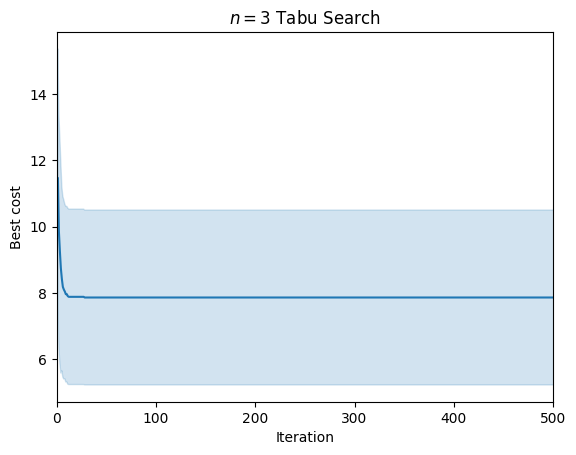

In [47]:
sns.lineplot(ts3, x="Iteration", y="Best cost", errorbar='sd')
plt.xlim(0, 500)
plt.title(r'$n=3$ Tabu Search')

Text(0.5, 1.0, '$n=4$ Tabu Search')

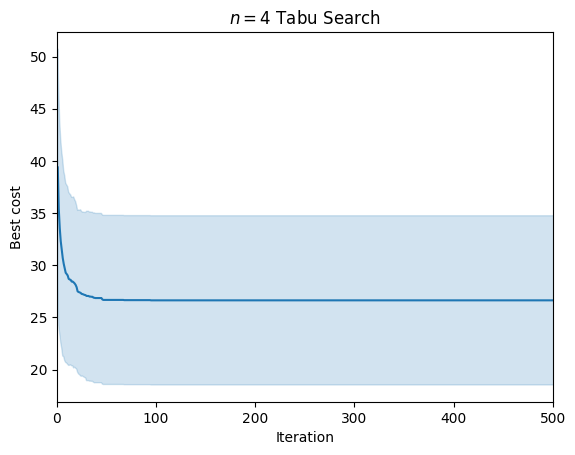

In [46]:
sns.lineplot(ts4, x="Iteration", y="Best cost", errorbar='sd')
plt.xlim(0, 500)
plt.title(r'$n=4$ Tabu Search')

Text(0.5, 1.0, '$n=5$ Tabu Search')

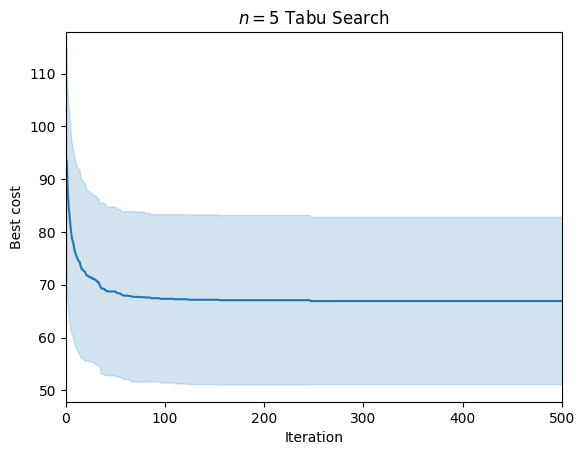

In [45]:
sns.lineplot(ts5, x="Iteration", y="Best cost", errorbar='sd')
plt.xlim(0, 500)
plt.title(r'$n=5$ Tabu Search')

Text(0.5, 1.0, '$n=6$ Tabu Search')

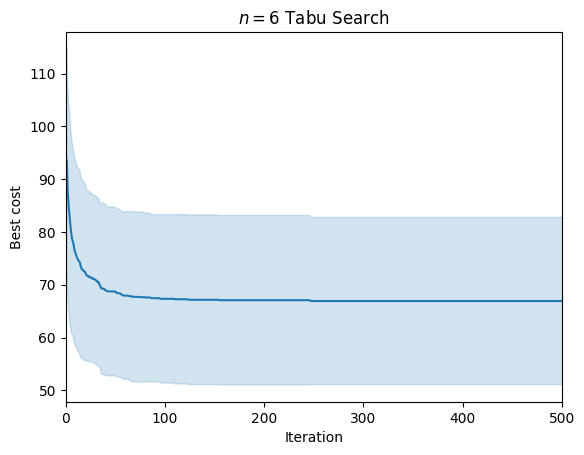

In [48]:
sns.lineplot(ts6, x="Iteration", y="Best cost", errorbar='sd')
plt.xlim(0, 500)
plt.title(r'$n=6$ Tabu Search')

## Genetic Algorithm

### Crossover methods

In [89]:
def pmx(p1, p2, idx):
    left = []
    right = p2[idx:]
    for char in p1[0: idx]:
        if char in right:
            mapping = p1[np.where(np.array(p2) == char)[0][0]]
            while mapping in right:
                mapping = p1[np.where(np.array(p2) == mapping)[0][0]]
            left.append(mapping)
        else:
            left.append(char)
    return left + right

def ox(p1, p2, idx):
    left = p1[0: idx]
    right = ''
    for char in p2:
        if char not in left:
            right += char
    return left + right

def cx(p1, p2):
    size = len(p1)
    child = [''] * size
    cycle = []
    while '' in child:
        cycle_start = child.index('')
        index = cycle_start
        new_cycle = []
        while True:
            new_cycle.append(index)
            index = p2.index(p1[index])
            if index == cycle_start:
                break
        if len(cycle) % 2 == 0:
            for i in new_cycle:
                child[i] = p1[i]
        else:
            for i in new_cycle:
                child[i] = p2[i]
        cycle.extend(new_cycle)
    return ''.join(child)

def mutate(child, idx1, idx2):
    temp = child[idx1]
    child[idx1] = child[idx2]
    child[idx2] = temp
    return child

### Algorithm

In [95]:
def ga(n_trials, n_gens, pop_size, p_cross, p_mutate, orders):
    data = []
    for order in orders:
        print(order)
        for trial in range(n_trials):
            current_gen = [random_sol(order) for _ in range(pop_size)]
            for gen in range(n_gens):
                new_gen = []
                current_gen.sort(key=lambda x: 1/(1+cost(make_matrix(x, order), order)))
                fitness_list = [1/(1+cost(make_matrix(ind, order), order)) for ind in current_gen]
                new_gen.append(current_gen[-1])
                best_fitness = max(fitness_list)
                average_fitness = np.mean(fitness_list)
                children = []
                while len(children) < pop_size:
                    temp_fitness_list = fitness_list.copy()
                    running_total = [sum(temp_fitness_list[0:i+1]) for i in range(len(temp_fitness_list))]
                    temp_current_gen = current_gen.copy()
                    num1 = random.uniform(0, sum(fitness_list))
                    for i in range(len(temp_fitness_list)):
                        if running_total[i] >= num1:
                            parent1 = temp_current_gen.pop(i)
                            temp_fitness_list.pop(i)
                            break
                    running_total = [sum(temp_fitness_list[0:i+1]) for i in range(len(temp_fitness_list))]
                    num2 = random.uniform(0, sum(temp_fitness_list))
                    for i in range(len(temp_fitness_list)):
                        if running_total[i] >= num2:
                            parent2 = temp_current_gen.pop(i)
                            temp_fitness_list.pop(i)
                            break
                    idx = random.randint(1, order**2 - 2)
                    cross = random.uniform(0, 1)
                    if cross <= p_cross:
                        choice = random.uniform(0, 1)
                        if choice <= 0.5:
                            child1 = pmx(parent1, parent2, idx)
                            children.append(child1)
                        else:
                            child1 = pmx(parent2, parent1, idx)
                            children.append(child1)
                    for child in children:
                        m = random.uniform(0, 1)
                        if m <= p_mutate:
                            idx1 = random.randint(0, len(child)-1)
                            idx2 = random.randint(0, len(child)-1)
                            child = mutate(child, idx1, idx2)
                    candidates = current_gen + children
                    candidates.sort(key=lambda x: 1/(1+cost(make_matrix(x, order), order)), reverse=True)
                    i=0
                    while len(new_gen) < pop_size:
                        new_gen.append(candidates[i])
                        i = i + 1
                    current_gen = new_gen
                data.append((trial+1, gen+1, average_fitness, best_fitness))
    return data

ga_data = ga(100, 10000, 10, 1, 0.03, [3,4,5,6])

3
4
5
6


In [96]:
ga_df = pd.DataFrame(ga_data, columns=["Trial", "Generation", "Average fitness", "Best fitness"])

In [104]:
ga_df['Order'] = 1000000*[3] + 1000000*[4] + 1000000*[5] + 1000000*[6]

In [107]:
ga_df.to_csv('ga.csv')

In [115]:
order3ga = ga_df[ga_df['Order']==3]
order4ga = ga_df[ga_df['Order']==4]
order5ga = ga_df[ga_df['Order']==5]
order6ga = ga_df[ga_df['Order']==6]

Text(0.5, 1.0, '$n=3$ GA')

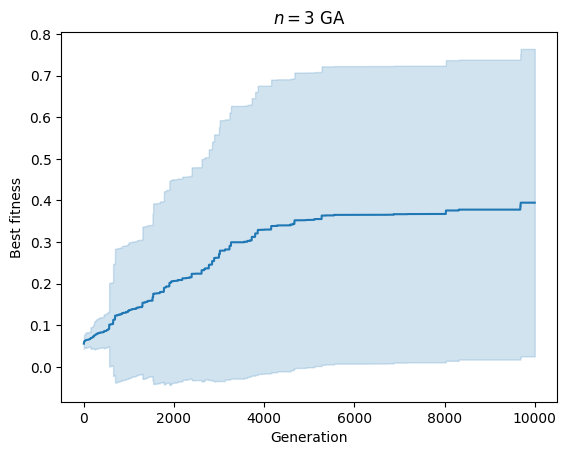

In [114]:
sns.lineplot(order3ga, x="Generation", y="Best fitness", errorbar='sd')
plt.title(r'$n=3$ GA')

In [125]:
len(order4ga[order4ga['Best fitness']==1]['Trial'].unique())

2

Text(0.5, 1.0, '$n=4$ GA')

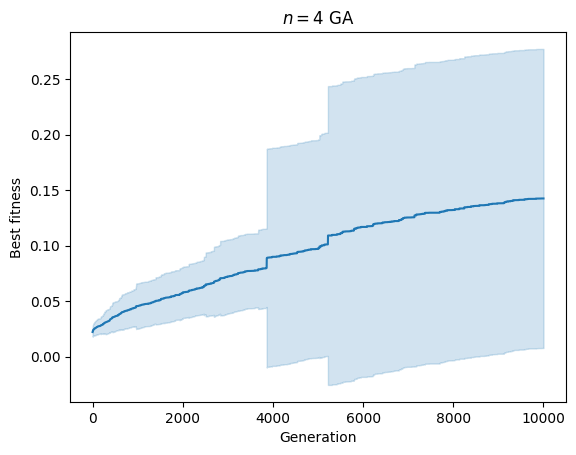

In [119]:
sns.lineplot(order4ga, x="Generation", y="Best fitness", errorbar='sd')
plt.title(r'$n=4$ GA')

Text(0.5, 1.0, '$n=5$ GA')

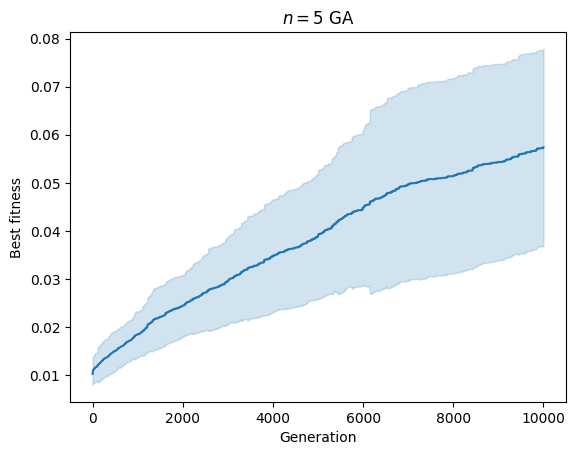

In [120]:
sns.lineplot(order5ga, x="Generation", y="Best fitness", errorbar='sd')
plt.title(r'$n=5$ GA')

Text(0.5, 1.0, '$n=6$ GA')

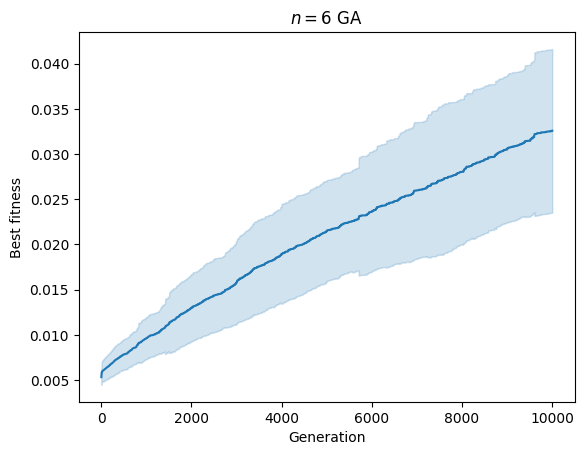

In [121]:
sns.lineplot(order6ga, x="Generation", y="Best fitness", errorbar='sd')
plt.title(r'$n=6$ GA')

In [1]:
import sympy as sp

In [2]:
x = sp.Symbol('x')

In [7]:
expression = (48*(x**2)-144*x+133)
2*expression

96*x**2 - 288*x + 266